# Step-1 Importing Required Libraries

In [1]:
import nltk
import codecs
import requests

import numpy as np
import pandas as pd
import seaborn as sns

from textblob import TextBlob
from bs4 import BeautifulSoup

from nltk.corpus import stopwords
from bs4 import BeautifulSoup as bs
from nltk.stem import WordNetLemmatizer

import warnings
warnings.filterwarnings('ignore')

# Step-2: Extracting Reviews

In [2]:
headers = {'authority': 'www.amazon.in',
           'accept-language': 'en-US,en;q=0.9',
           'referer': 'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/dp/B0B574QXFL/ref=sr_1_3?adgrpid=66314740727&ext_vrnc=hi&gclid=CjwKCAiAheacBhB8EiwAItVO27OqojMgIrqr8l4RkhJXVEgEYEy5H4Hv_ggVfrdU-8RF6WYv_aDItRoCKvwQAvD_BwE&hvadid=398059830400&hvdev=c&hvlocphy=1007768&hvnetw=g&hvqmt=b&hvrand=1335892987492695214&hvtargid=kwd-1434352673191&hydadcr=24569_1971431&keywords=boat+xtend+pro&qid=1671035479&sr=8-3',
           'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}

In [3]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [4]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                      'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                      'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                      'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass

In [5]:
from tqdm import tqdm_notebook
for x in tqdm_notebook(range(160)):
    soup = get_soup(f'https://www.amazon.in/Oppo-Glowing-SUPERVOOC-Additional-Exchange/product-reviews/B082F2T5PQ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/160 [00:00<?, ?it/s]

In [6]:
df = pd.DataFrame(reviewlist)
df.head()

,Title,Rating,Review,Review_Date
0,4.0 out of 5 stars\nGood product in this price.,4.0,Good product in this price.,Reviewed in India on 24 October 2023
1,3.0 out of 5 stars\nOverall review,3.0,Visual screen not good performance not good no...,Reviewed in India on 12 November 2023
2,3.0 out of 5 stars\nFeatures are less in this ...,3.0,I am oppo lover if I go for budgeted phone und...,Reviewed in India on 10 October 2023
3,5.0 out of 5 stars\nNice,5.0,Nice phn,Reviewed in India on 7 November 2023
4,5.0 out of 5 stars\nEverything ok,5.0,Always ok,Reviewed in India on 2 November 2023


In [7]:
df["Review_Date"] = df["Review_Date"].replace('Reviewed in India on','', regex=True)

In [8]:
df.head(50)

,Title,Rating,Review,Review_Date
0,4.0 out of 5 stars\nGood product in this price.,4.0,Good product in this price.,24 October 2023
1,3.0 out of 5 stars\nOverall review,3.0,Visual screen not good performance not good no...,12 November 2023
2,3.0 out of 5 stars\nFeatures are less in this ...,3.0,I am oppo lover if I go for budgeted phone und...,10 October 2023
3,5.0 out of 5 stars\nNice,5.0,Nice phn,7 November 2023
4,5.0 out of 5 stars\nEverything ok,5.0,Always ok,2 November 2023
5,4.0 out of 5 stars\nNice mobile,4.0,Looking nice....,11 September 2023
6,5.0 out of 5 stars\nGood,5.0,Good and nice product by oppo,1 November 2023
7,5.0 out of 5 stars\nGood,5.0,Good,29 October 2023
8,4.0 out of 5 stars\nNice mobile,4.0,Good product,23 August 2023
9,5.0 out of 5 stars\nGood quality and excellent...,5.0,All purpose,20 October 2023


# Step-3: Writing Reviews to CSV file

In [9]:
df.to_csv("Oppo_A78_Review.csv")

In [10]:
reviews = pd.read_csv('Oppo_A78_Review.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Title,Rating,Review,Review_Date
0,4.0 out of 5 stars\nGood product in this price.,4.0,Good product in this price.,24 October 2023
1,3.0 out of 5 stars\nOverall review,3.0,Visual screen not good performance not good no...,12 November 2023
2,3.0 out of 5 stars\nFeatures are less in this ...,3.0,I am oppo lover if I go for budgeted phone und...,10 October 2023
3,5.0 out of 5 stars\nNice,5.0,Nice phn,7 November 2023
4,5.0 out of 5 stars\nEverything ok,5.0,Always ok,2 November 2023
5,4.0 out of 5 stars\nNice mobile,4.0,Looking nice....,11 September 2023
6,5.0 out of 5 stars\nGood,5.0,Good and nice product by oppo,1 November 2023
7,5.0 out of 5 stars\nGood,5.0,Good,29 October 2023
8,4.0 out of 5 stars\nNice mobile,4.0,Good product,23 August 2023
9,5.0 out of 5 stars\nGood quality and excellent...,5.0,All purpose,20 October 2023


In [11]:
df1 = reviews[['Review']]
df1

,Review
0,Good product in this price.
1,Visual screen not good performance not good no...
2,I am oppo lover if I go for budgeted phone und...
3,Nice phn
4,Always ok
5,Looking nice....
6,Good and nice product by oppo
7,Good
8,Good product
9,All purpose


# Step-4: EDA

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  10 non-null     object
dtypes: object(1)
memory usage: 212.0+ bytes


In [13]:
df1.describe()

,Review
count,10
unique,10
top,Good product in this price.
freq,1


In [14]:
df1.isnull().sum()

Review    0
dtype: int64

In [15]:
import re 
import string

def clean_text(text):
    
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

In [16]:
# Clean The Text
df1["Review"] = df1["Review"].apply(clean_text)
df1.head()

,Review
0,good product in this price
1,visual screen not good performance not good no...
2,i am oppo lover if i go for budgeted phone und...
3,nice phn
4,always ok


In [17]:
# Word frequency 
freq = pd.Series(' '.join(df1['Review']).split()).value_counts()[:20] # for top 20
freq

good           6
phone          5
this           5
i              4
in             3
product        3
not            3
oppo           3
nice           3
to             2
is             2
totally        2
buy            2
but            2
am             2
price          2
anyone         1
recommended    1
their          1
all            1
dtype: int64

In [18]:
# removing stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
df1['Review'] = df1['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [19]:
# word frequency after removal of stopwords
freq_Sw = pd.Series(' '.join(df1['Review']).split()).value_counts()[:20] # for top 20
freq_Sw

good           6
phone          5
oppo           3
product        3
nice           3
price          2
buy            2
totally        2
processorin    1
range          1
display        1
fingerprint    1
lock           1
side           1
waste          1
buttondont     1
slow           1
moneynever     1
recommended    1
anyone         1
dtype: int64

# Step-5: Sentimental Analysis

In [20]:
from textblob import TextBlob

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity


In [21]:
df1['Subjectivity'] = df1['Review'].apply(getSubjectivity)
df1['Polarity'] = df1['Review'].apply(getPolarity)

In [22]:
def getSentiment(value):
  if value < 0:
    return 'Negative'
  elif value > 0:
    return 'Positive'
  else:
    return 'Neutral'

df1['Sentiment'] = df1['Polarity'].apply(getSentiment)
df1.head()

,Review,Subjectivity,Polarity,Sentiment
0,good product price,0.600000,0.700000,Positive
1,visual screen good performance good given back...,0.316667,0.333333,Positive
2,oppo lover go budgeted phone using oppo totall...,0.383333,-0.416667,Negative
3,nice phn,1.000000,0.600000,Positive
4,always ok,0.500000,0.500000,Positive


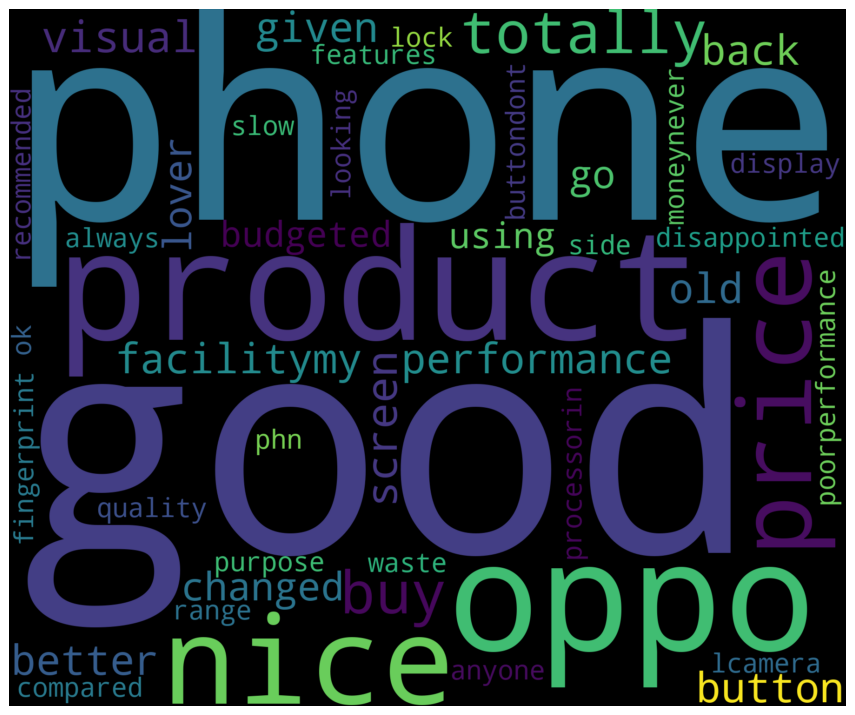

In [23]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allwords = " ".join([twts for twts in df1["Review"]])
wordCloud = WordCloud(width = 1800, height = 1500, random_state = 21).generate(allwords)
plt.figure(figsize=(12,12), dpi=90)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

# Step-6: Visualizations

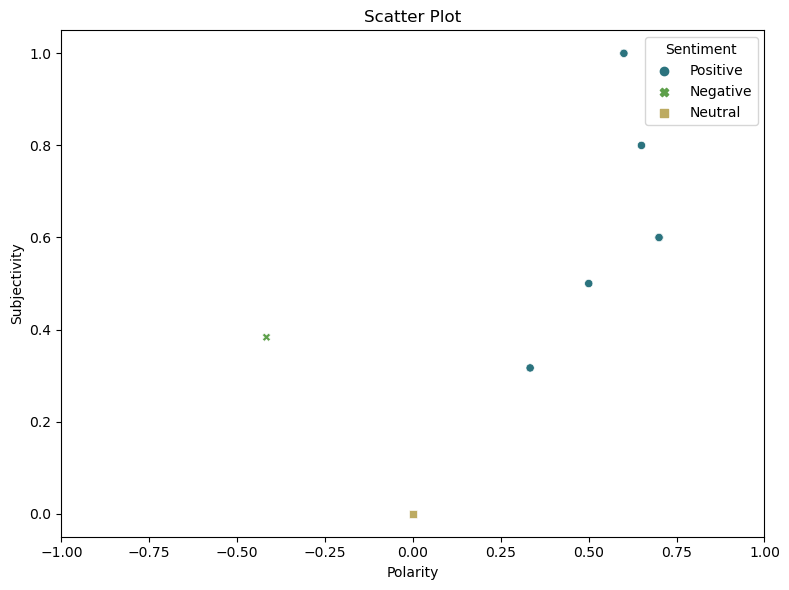

In [24]:
# Scatter Plot
plt.figure(figsize = (8,6))

markers = {'Positive':'o', 'Neutral':'s','Negative':'X'}

sns.scatterplot(data=df1, x='Polarity', y='Subjectivity', hue = 'Sentiment', style = 'Sentiment', markers = markers, palette = 'gist_earth').set(xlim=(-1,1))
plt.title('Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

plt.tight_layout()


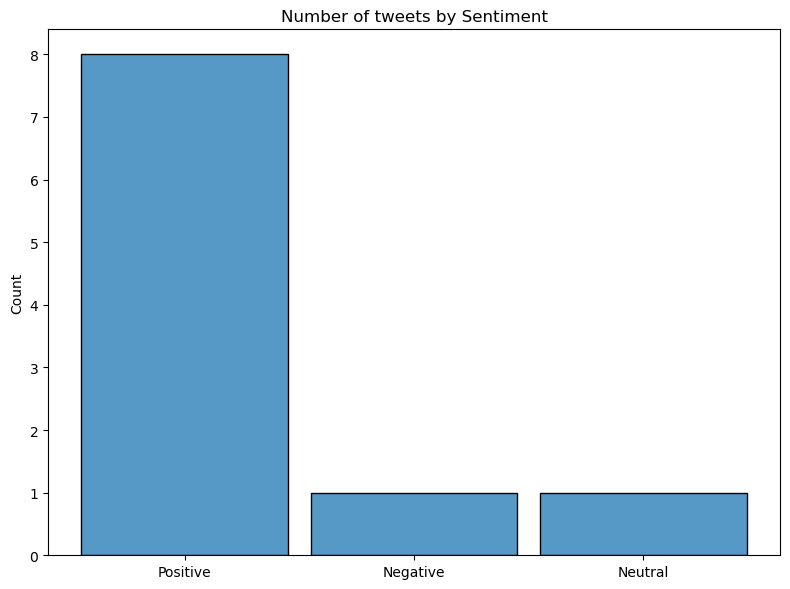

In [25]:
# Bar Plot
plt.figure(figsize = (8,6))

sns.histplot(df1, x = 'Sentiment', shrink=0.9).set(xlabel = None)
plt.title('Number of tweets by Sentiment')

plt.tight_layout()

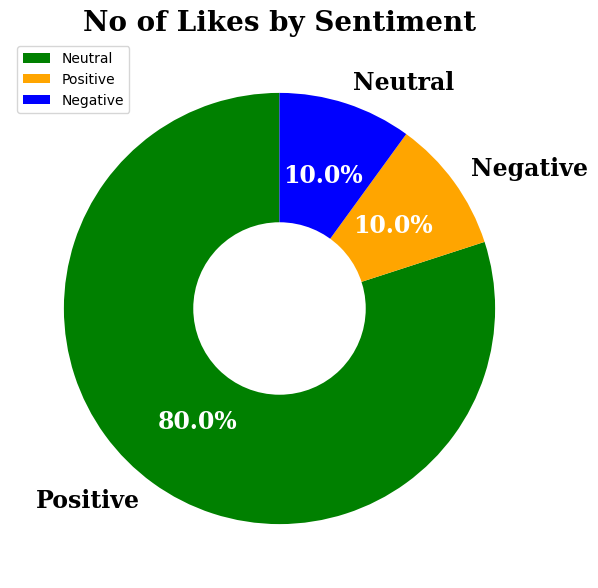

In [26]:
# Pie Chart
label_data=df1['Sentiment'].value_counts()

explode=(0.1,0.1)
plt.figure(figsize=(12,7))
patches, texts, pcts= plt.pie(label_data,labels=label_data.index,colors=['green','orange','blue'],pctdistance=0.65,
                             startangle=90,autopct='%1.1f%%',
                             textprops={'fontsize':17,'color':'black','weight':'bold','family':'serif'})
plt.setp(pcts,color='white')
hfont={'weight':'bold','family':'serif'}
plt.title('No of Likes by Sentiment',size=20,**hfont)

centre_circle=plt.Circle((0,0),0.40,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(['Neutral','Positive','Negative'],loc="upper left")
plt.show()

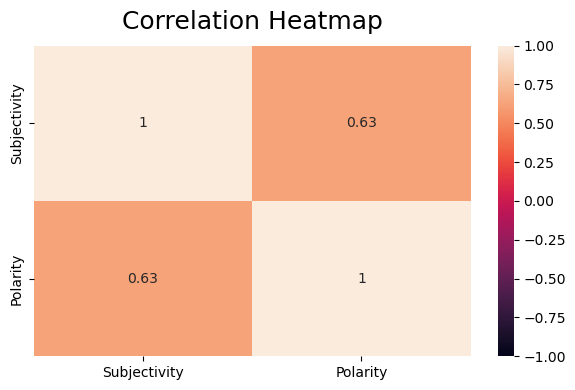

In [27]:
# Correlation

plt.figure(figsize=(6, 4))

heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

plt.tight_layout()